In [1]:

import numpy as np
import pandas as pd
import scipy 
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import os


In [2]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 11\\')

In [3]:
cars= pd.read_csv('mtcars.csv')
display (cars)


,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
x= cars.iloc[:,[1,3,4,6]].values
print (x)


[[ 21.    160.    110.      2.62 ]
 [ 21.    160.    110.      2.875]
 [ 22.8   108.     93.      2.32 ]
 [ 21.4   258.    110.      3.215]
 [ 18.7   360.    175.      3.44 ]
 [ 18.1   225.    105.      3.46 ]
 [ 14.3   360.    245.      3.57 ]
 [ 24.4   146.7    62.      3.19 ]
 [ 22.8   140.8    95.      3.15 ]
 [ 19.2   167.6   123.      3.44 ]
 [ 17.8   167.6   123.      3.44 ]
 [ 16.4   275.8   180.      4.07 ]
 [ 17.3   275.8   180.      3.73 ]
 [ 15.2   275.8   180.      3.78 ]
 [ 10.4   472.    205.      5.25 ]
 [ 10.4   460.    215.      5.424]
 [ 14.7   440.    230.      5.345]
 [ 32.4    78.7    66.      2.2  ]
 [ 30.4    75.7    52.      1.615]
 [ 33.9    71.1    65.      1.835]
 [ 21.5   120.1    97.      2.465]
 [ 15.5   318.    150.      3.52 ]
 [ 15.2   304.    150.      3.435]
 [ 13.3   350.    245.      3.84 ]
 [ 19.2   400.    175.      3.845]
 [ 27.3    79.     66.      1.935]
 [ 26.    120.3    91.      2.14 ]
 [ 30.4    95.1   113.      1.513]
 [ 15.8   351.    26

In [5]:
y= cars.iloc[:,9].values
print (y)


[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1]


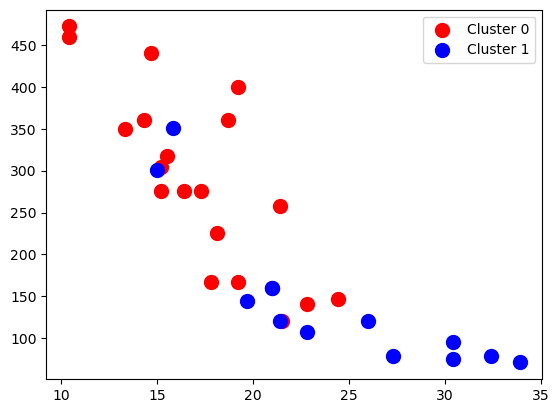

In [6]:

plt.scatter(x[y==0,0], x[y==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(x[y==1,0], x[y==1,1], s=100, c='blue', label='Cluster 1')
plt.legend()
plt.show()


In [7]:
z= linkage(x,'ward')
display (z)


array([[0.00000000e+00, 1.00000000e+00, 2.55000000e-01, 2.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 9.62081078e-01, 2.00000000e+00],
       [9.00000000e+00, 1.00000000e+01, 1.40000000e+00, 2.00000000e+00],
       [1.30000000e+01, 3.30000000e+01, 1.91028794e+00, 3.00000000e+00],
       [1.70000000e+01, 2.50000000e+01, 5.11568422e+00, 2.00000000e+00],
       [2.00000000e+01, 2.60000000e+01, 7.50970206e+00, 2.00000000e+00],
       [6.00000000e+00, 2.30000000e+01, 1.00535019e+01, 2.00000000e+00],
       [1.90000000e+01, 3.60000000e+01, 1.01665501e+01, 3.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 1.40034719e+01, 2.00000000e+00],
       [2.00000000e+00, 3.70000000e+01, 1.41771086e+01, 3.00000000e+00],
       [1.40000000e+01, 1.50000000e+01, 1.56214684e+01, 2.00000000e+00],
       [1.80000000e+01, 3.90000000e+01, 1.67874736e+01, 4.00000000e+00],
       [3.10000000e+01, 4.10000000e+01, 1.98677806e+01, 4.00000000e+00],
       [3.20000000e+01, 3.40000000e+01, 2.16096995e

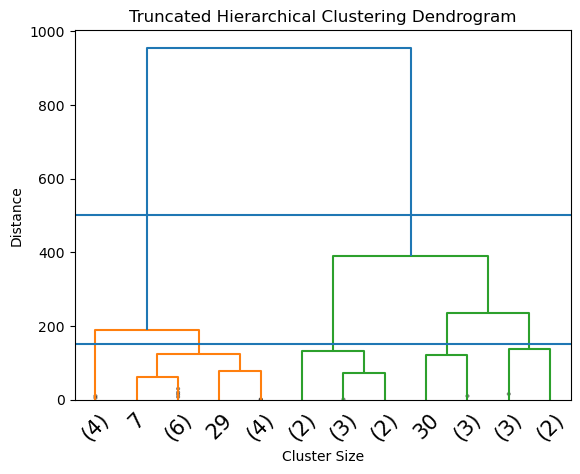

In [8]:

dendrogram(z, truncate_mode = 'lastp',p = 12 , leaf_rotation =45., leaf_font_size =15, show_contracted = True)
plt.title ('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()



Accuracy of the model


0.78125


Number of records in each cluster


0
0    16
1    16
Name: count, dtype: int64

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

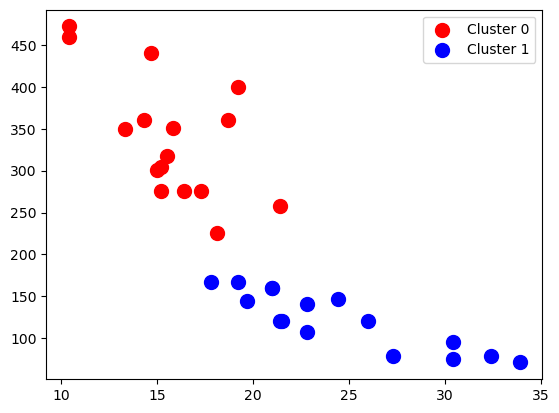

In [9]:

k = 2
hclustering = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage ='ward')
y_hc = hclustering.fit_predict (x)
print ('Accuracy of the model')
display (sm.accuracy_score (y ,y_hc))
print ()
print ('Number of records in each cluster')
display (pd.DataFrame(y_hc).value_counts())
print ()
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster 1')
plt.legend()
plt.show()



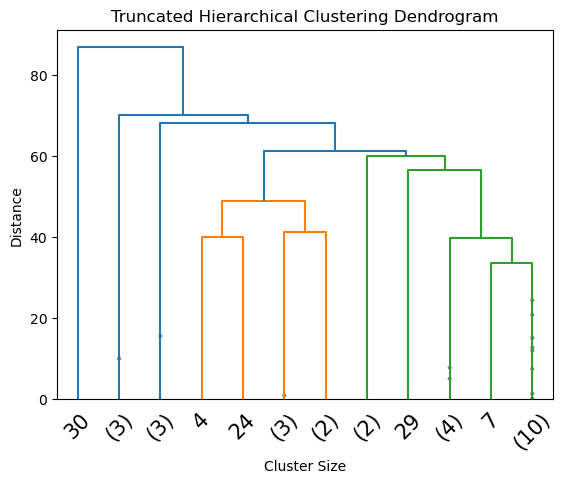

Accuracy of the model


0.625


Number of records in each cluster


0
0    31
1     1
Name: count, dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

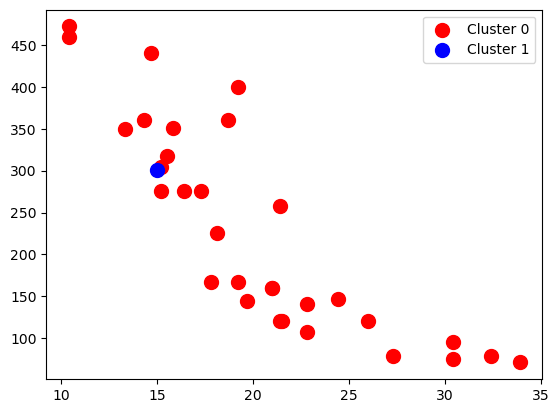

In [10]:

z= linkage(x,'single')
dendrogram(z, truncate_mode = 'lastp',p = 12 , leaf_rotation =45., leaf_font_size =15, show_contracted = True)
plt.title ('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()
k = 2
hclustering = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage ='single')
y_hc = hclustering.fit_predict (x)
print ('Accuracy of the model')
display (sm.accuracy_score (y ,y_hc))
print ()
print ('Number of records in each cluster')
display (pd.DataFrame(y_hc).value_counts())
print ()
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster 1')
plt.legend()
plt.show()


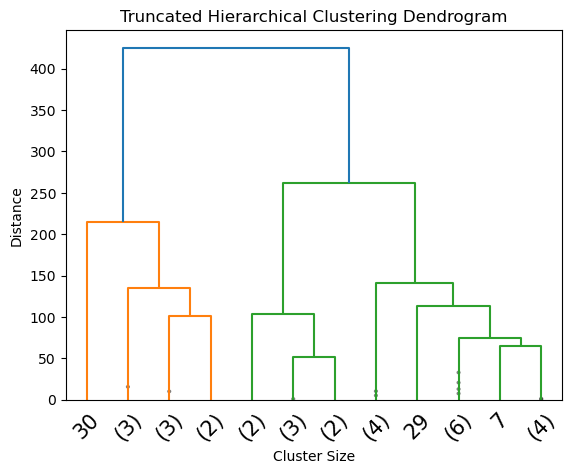

Accuracy of the model


0.4375


Number of records in each cluster


0
0    23
1     9
Name: count, dtype: int64

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

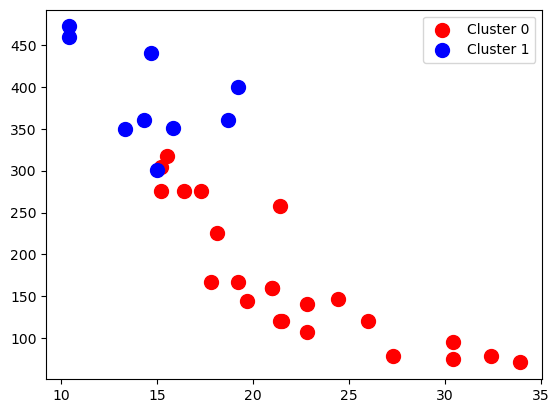

In [11]:

z= linkage(x,'complete')
dendrogram(z, truncate_mode = 'lastp',p = 12 , leaf_rotation =45., leaf_font_size =15, show_contracted = True)
plt.title ('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()
k = 2
hclustering = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage ='complete')
y_hc = hclustering.fit_predict (x)
print ('Accuracy of the model')
display (sm.accuracy_score (y ,y_hc))
print ()
print ('Number of records in each cluster')
display (pd.DataFrame(y_hc).value_counts())
print ()
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster 1')
plt.legend()
plt.show()




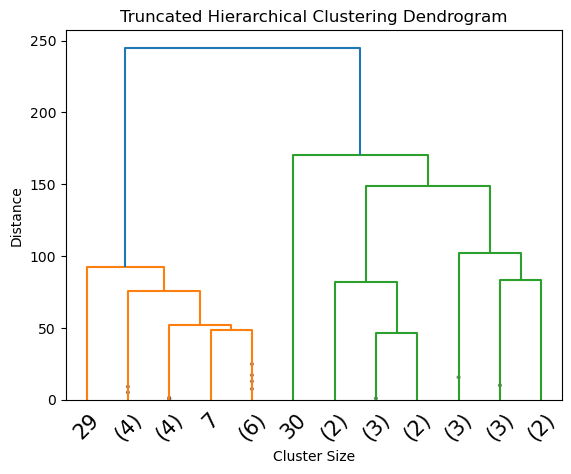

Accuracy of the model


0.78125


Number of records in each cluster


0
0    16
1    16
Name: count, dtype: int64

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

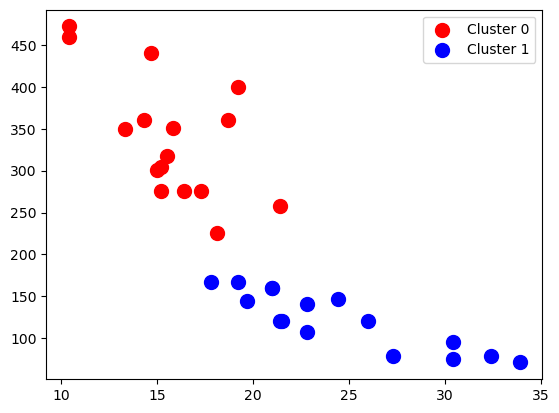

In [12]:

z= linkage(x,'average')
dendrogram(z, truncate_mode = 'lastp',p = 12 , leaf_rotation =45., leaf_font_size =15, show_contracted = True)
plt.title ('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()
k = 2
hclustering = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage ='average')
y_hc = hclustering.fit_predict (x)
print ('Accuracy of the model')
display (sm.accuracy_score (y ,y_hc))
print ()
print ('Number of records in each cluster')
display (pd.DataFrame(y_hc).value_counts())
print ()
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster 1')
plt.legend()
plt.show()

